In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dvc = 50
delta = 0.05

def mh(N):
  return N ** dvc

def safe_log(term):
  return max(np.log(term), 1e-10)

def vc_bound(N, delta):
  return np.sqrt((8 / N) * np.log(4 * mh(2 * N) / delta))

def rademacher_bound(N, delta):
  return np.sqrt((2 * safe_log(2 * N * mh(N))) / N) + np.sqrt((2 * safe_log(1 / delta)) / N) + 1 / N

def parrondo_bound_approx(N, delta):
  epsilon = np.sqrt((1 / N) * safe_log(6 * mh(2 * N) / delta))
  return np.sqrt((1 / N) * (2 * epsilon + safe_log(6 * mh(2 * N) / delta)))

def devroye_bound_approx(N, delta):
  epsilon = np.sqrt((1 / N) * safe_log(2 * mh(N) / np.sqrt(delta)))
  return np.sqrt((1 / (2 * N)) * (4 * epsilon * (1 + epsilon) + 2 * safe_log(2 * mh(N) / np.sqrt(delta))))

def test_bounds(N, zoom=True):
  if zoom:
    N_values = np.arange(N)
  else:
    N_values = np.arange(.2, N, .2)

  vc_vals = []
  rademacher_vals = []
  parrondo_vals = []
  devroye_vals = []

  for n in N_values:
    vc_vals.append(vc_bound(n, delta))
    rademacher_vals.append(rademacher_bound(n, delta))
    parrondo_vals.append(parrondo_bound_approx(n, delta))
    devroye_vals.append(devroye_bound_approx(n, delta))

  vc_vals = np.array(vc_vals)
  rademacher_vals = np.array(rademacher_vals)
  parrondo_vals = np.array(parrondo_vals)
  devroye_vals = np.array(devroye_vals)

  print(rademacher_vals)

  valid_indices_vc = ~np.isnan(vc_vals)
  valid_indices_rademacher = ~np.isnan(rademacher_vals)
  valid_indices_parrondo = ~np.isnan(parrondo_vals)
  valid_indices_devroye = ~np.isnan(devroye_vals)

  plt.figure()
  plt.plot(N_values[valid_indices_vc], vc_vals[valid_indices_vc], label='VC', color='blue')
  plt.plot(N_values[valid_indices_rademacher], rademacher_vals[valid_indices_rademacher], label='Rademacher Penalty', color='green')
  plt.plot(N_values[valid_indices_parrondo], parrondo_vals[valid_indices_parrondo], label='Parrondo', color='red')
  plt.plot(N_values[valid_indices_devroye], devroye_vals[valid_indices_devroye], label='Devroye', color='purple')
  plt.legend()
  plt.show()

  if zoom:
    plt.figure()
    plt.plot(N_values[valid_indices_vc], vc_vals[valid_indices_vc], label='VC', color='blue')
    plt.plot(N_values[valid_indices_rademacher], rademacher_vals[valid_indices_rademacher], label='Rademacher Penalty', color='green')
    plt.plot(N_values[valid_indices_parrondo], parrondo_vals[valid_indices_parrondo], label='Parrondo', color='red')
    plt.plot(N_values[valid_indices_devroye], devroye_vals[valid_indices_devroye], label='Devroye', color='purple')
    plt.xlim(4000, 6000)
    plt.ylim(0.05, 0.2)
    plt.legend()
    plt.show()

<ipython-input-136-18c70ef457a8>:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((8 / N) * np.log(4 * mh(2 * N) / delta))


[10.47335993  6.37024992  4.82671249  3.98667996  4.62515685  7.14856725
  7.83321887  8.11251554  8.21764122  8.23445506  8.202839    8.14363449
  8.06856918  7.98458191  7.895924    7.80526258  7.71429502  7.62410721
  7.53539045  7.44857674  7.36392539  7.28157965  7.20160431  7.1240112 ]


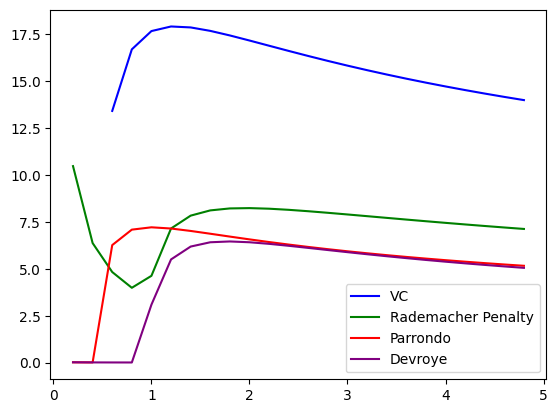

In [ ]:
test_bounds(5, zoom=False)

<ipython-input-136-18c70ef457a8>:11: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt((8 / N) * np.log(4 * mh(2 * N) / delta))
<ipython-input-136-18c70ef457a8>:11: RuntimeWarning: divide by zero encountered in log
  return np.sqrt((8 / N) * np.log(4 * mh(2 * N) / delta))
<ipython-input-136-18c70ef457a8>:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((8 / N) * np.log(4 * mh(2 * N) / delta))
<ipython-input-136-18c70ef457a8>:8: RuntimeWarning: divide by zero encountered in log
  return max(np.log(term), 1e-10)
<ipython-input-136-18c70ef457a8>:14: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt((2 * safe_log(2 * N * mh(N))) / N) + np.sqrt((2 * safe_log(1 / delta)) / N) + 1 / N
<ipython-input-136-18c70ef457a8>:14: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt((2 * safe_log(2 * N * mh(N))) / N) + np.sqrt((2 * safe_log(1 / delta)) / N) + 1 / N
<ipython-input-136-18c70ef457a8>:17: RuntimeWa

[       inf 4.62515685 8.23445506 ...        nan        nan 0.1175005 ]


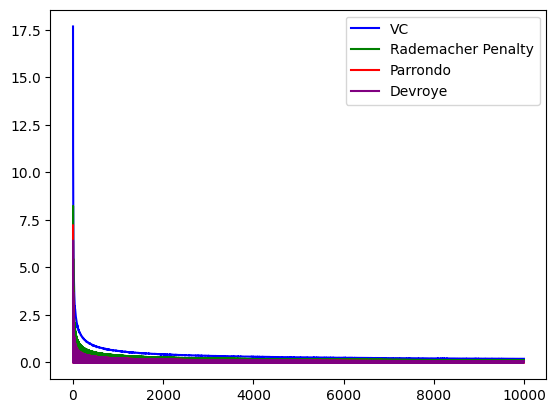

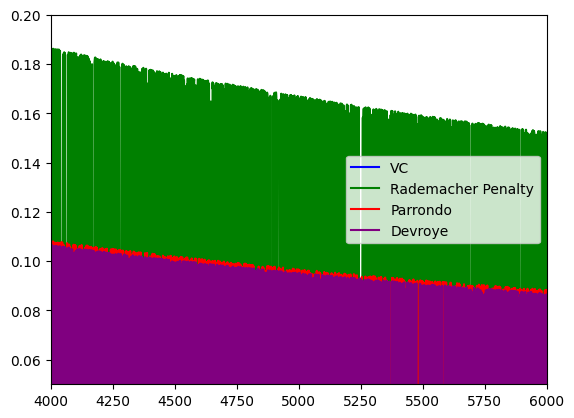

In [ ]:
test_bounds(10000)

Problems 4-7

In [ ]:
def f(x):
  return np.sin(np.pi * x)

def generate_dataset(f, n=2):
  x = np.random.uniform(-1, 1, n)
  y = f(x)
  return np.column_stack((x, y))

def mse(predictions, Y):
  errors = predictions - Y
  return np.mean(errors ** 2)

def find_best_a(X, Y):
  a_values = np.arange(-10, 10, 0.01)
  mse_values = [mse(a * X, Y) for a in a_values]
  best_a = a_values[np.argmin(mse_values)]
  return best_a

def compute_a(find_best_a):
  dataset = generate_dataset(f)
  return find_best_a(dataset[:, 0], dataset[:, 1])

def average_a(find_best_a, n=5000):
  a_list = [compute_a(find_best_a) for i in range(n)]
  return np.mean(a_list)

a_hat = average_a(find_best_a)
print("a:", str(a_hat))

a: 1.4090759999997569


In [ ]:
def bias(f, g_bar, x):
    return np.mean([(f(x_i) - g_bar(x_i)) ** 2 for x_i in x])

def g_bar(x):
    return a_hat * x

X = np.arange(-1, 1, 0.001)
bias_value = bias(f, g_bar, X)
print("bias:", bias_value)

bias: 0.2647871509297578


In [ ]:
def variance(g_D, g_bar, x, n=1000):
    return np.mean([bias(g_D, g_bar, x) for i in range(n)])

variance_value = variance(f, g_bar, X)
print(variance_value)

0.26478715092975774


In [ ]:
def find_best_a_quad(X, Y):
  a_values = np.arange(-10, 10, 0.01)
  mse_values = [mse(a * (X ** 2), Y) for a in a_values]
  best_a = a_values[np.argmin(mse_values)]
  return best_a

a_hat_quad = average_a(find_best_a_quad)
print(a_hat_quad)

def g_bar_quad(x):
  return a_hat_quad * (x ** 2)

bias_value_quad = bias(f, g_bar_quad, X)
print("bias:", bias_value_quad)

-0.053786000000211956
bias: 0.5005785877235153


In [ ]:
def find_best_ab_quad_bias(X, Y, n=10):
  best_a, best_b = 0, 0
  best_mse = float('inf')

  for i in range(n):
    a = np.random.uniform(-0.1, 0.1)
    b = np.random.uniform(-1, 1)

    h = lambda x: a * x**2 + b

    cur_mse = mse(a * (X ** 2) + b, Y)
    if cur_mse < best_mse:
        best_mse = cur_mse
        best_a, best_b = a, b

  return best_a, best_b

def compute_ab(find_best_a):
  dataset = generate_dataset(f)
  return find_best_a(dataset[:, 0], dataset[:, 1])

def average_ab(find_best_a, n=1000):
  a_list = [compute_ab(find_best_a) for i in range(n)]
  return np.mean(a_list, axis=0)

a_hat_quad_bias, b_hat_quad_bias = average_ab(find_best_ab_quad_bias)
print(a_hat_quad_bias)
print(b_hat_quad_bias)

def g_bar_quad_bias(x):
  return a_hat_quad_bias * (x ** 2) + b_hat_quad_bias

bias_value_quad = bias(f, g_bar_quad_bias, X)
print("bias:", bias_value_quad)

0.001297969742063256
0.006678021298441297
bias: 0.5000507114967246
